In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV, average_normal_dist
from nsimpkg.gaussian_OAIS import AdaGrad_OAIS, Adam_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)

plt.rcParams['figure.dpi'] = 300

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = NormalRV(np.array([1, -1]), np.array([[2, -0.5], [-0.5, 2]]))

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 1000
nexperiments = 10
Niter_AdaOAIS = 3*int(1e4)
alpha_AdaGrad = 1e-1
alpha_Adam = 1e-2
results_array_Adam = []
results_array_AdaGrad = []
distribution_array_Adam = []
distribution_array_AdaGrad = []
for _ in range(nexperiments):
    r_AdaGrad, d_AdaGrad = AdaGrad_OAIS(phi, pi, q, N, Niter_AdaOAIS, alpha=alpha_AdaGrad)
    r_Adam, d_Adam = Adam_OAIS(phi, pi, q, N, Niter_AdaOAIS, alpha=alpha_Adam)
    results_array_Adam.append(r_Adam)
    distribution_array_Adam.append(d_Adam)
    results_array_AdaGrad.append(r_AdaGrad)
    distribution_array_AdaGrad.append(d_AdaGrad)

 23%|██▎       | 6861/30000 [01:04<03:38, 105.94it/s]


KeyboardInterrupt: 

In [38]:
Adam_distributions_t = np.array(distribution_array_Adam).T[:100]
AdaGrad_distributions_t = np.array(distribution_array_AdaGrad).T[:100]
Adam_average_distributions = [average_normal_dist(d) for d in Adam_distributions_t]
AdaGrad_average_distributions = [average_normal_dist(d) for d in AdaGrad_distributions_t]

print("Adam: ", Adam_average_distributions[:2])
print("AdaGrad: ", AdaGrad_average_distributions[:2])

Adam:  [N([ 10. -10.], [[40.  0.]
 [ 0. 40.]]), N([ 5.3328508 -5.3334712], [[31.11111127  8.88888905]
 [ 8.88888905 31.11111127]])]
AdaGrad:  [N([ 10. -10.], [[40.  0.]
 [ 0. 40.]]), N([ 0.66666663 -0.66666671], [[22.22222382 17.77777938]
 [17.77777938 22.22222382]])]


In [37]:
[d.mu[0] for d in Adam_average_distributions]

[10.0,
 5.332850798490981,
 3.8965545542834774,
 3.1733892121352874,
 2.728932749948244,
 2.4243147579818842,
 2.201454076277686,
 2.031057333818106,
 1.8963654952098614,
 1.7871568463574175,
 1.6970164020771683,
 1.621418786560773,
 1.557220779667241,
 1.5021895395581535,
 1.454596498550861,
 1.4131664503131234,
 1.3768600441296006,
 1.3448610721279708,
 1.316530583949013,
 1.2913495439750242,
 1.2688763674424295,
 1.2487860460622644,
 1.2307623458380648,
 1.2145545471531132,
 1.1999528398983377,
 1.1867704839735176,
 1.174871537944862,
 1.164090258088309,
 1.1543141727916617,
 1.1454315652385827,
 1.1373579098575863,
 1.1300086255720103,
 1.123294831872273,
 1.1171568377077559,
 1.1115416974221546,
 1.1063960679717622,
 1.1016727677020068,
 1.0973401640926415,
 1.0933649133724899,
 1.089695579893593,
 1.0863300029186536,
 1.0832487208826052,
 1.0804038216771479,
 1.0777810000137173,
 1.0753470433421157,
 1.073094474332627,
 1.071009974072114,
 1.0690784661687212,
 1.0672729276017823,

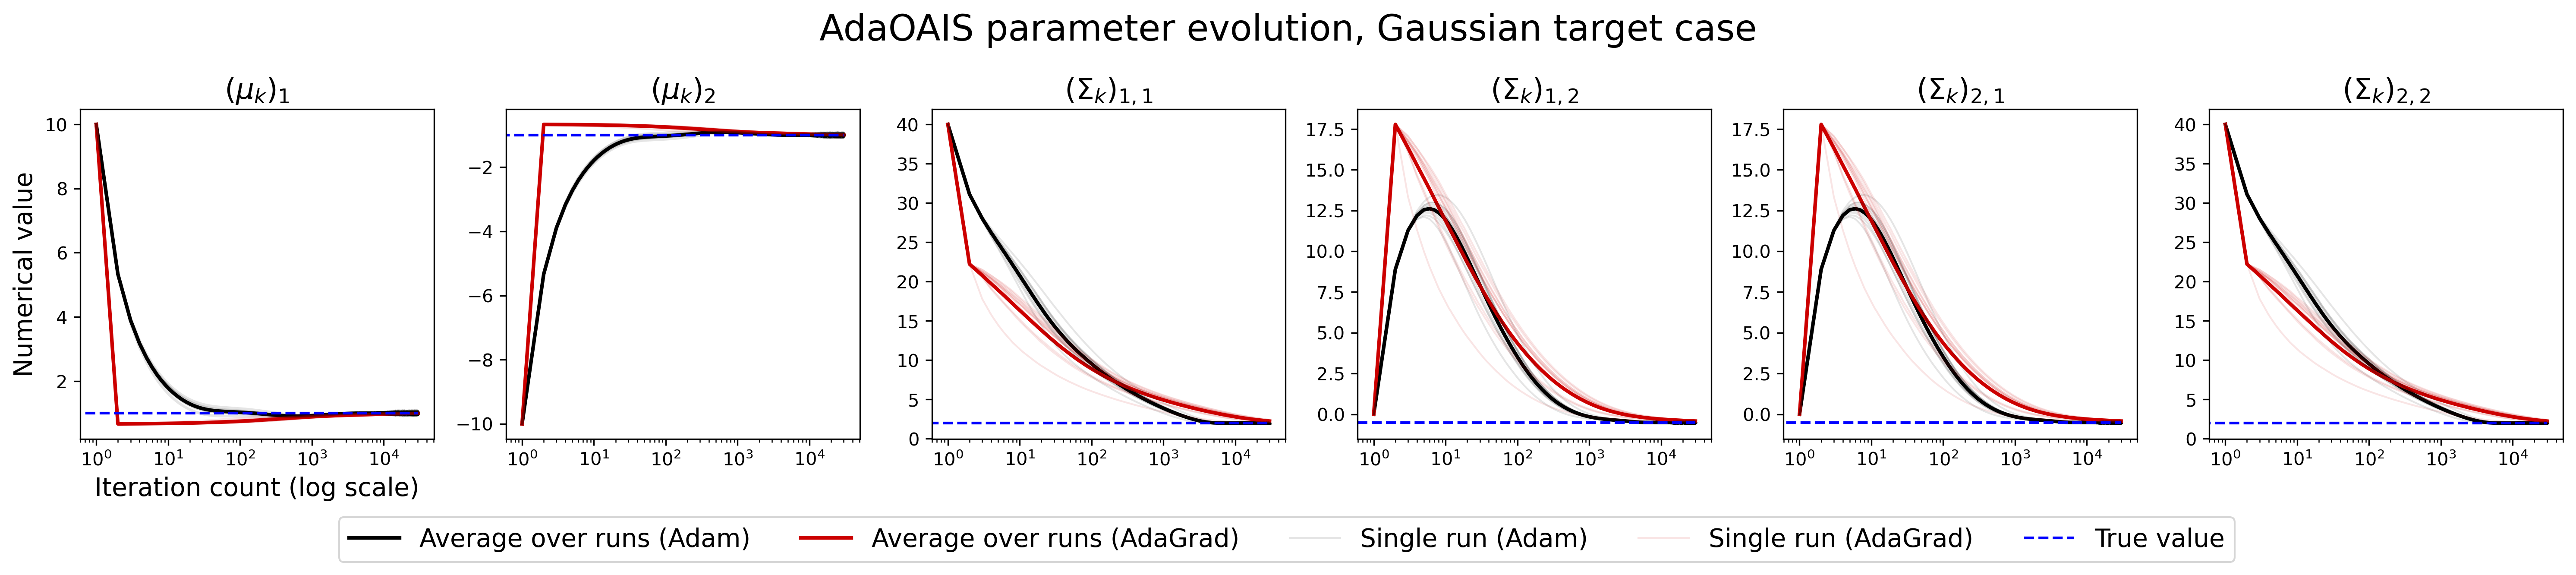

In [53]:
alpha = 0.1
Niter = len(distribution_array_Adam[0])
Adam_distributions_t = np.array(distribution_array_Adam).T
AdaGrad_distributions_t = np.array(distribution_array_AdaGrad).T
Adam_average_distributions = [average_normal_dist(d) for d in Adam_distributions_t]
AdaGrad_average_distributions = [average_normal_dist(d) for d in AdaGrad_distributions_t]

fig, axs = plt.subplots(1, 6, figsize=(20, 4))
axs[0].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[0] for d in Adam_average_distributions], color="black", label="Average over runs (Adam)", linewidth=2)
axs[0].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[0] for d in AdaGrad_average_distributions], color=[0.8, 0, 0], label="Average over runs (AdaGrad)", linewidth=2)
axs[1].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[1] for d in Adam_average_distributions], color="black", label="Average over runs (Adam)", linewidth=2)
axs[1].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[1] for d in AdaGrad_average_distributions], color=[0.8, 0, 0], label="Average over runs (AdaGrad)", linewidth=2)

for i, (Adam_distribution_list, AdaGrad_distribution_list) in enumerate(zip(distribution_array_Adam, distribution_array_AdaGrad)):
    if i == 0:
        axs[0].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[0] for d in Adam_distribution_list], color="black", alpha=alpha, label="Single run (Adam)", linewidth=1)
        axs[1].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[1] for d in Adam_distribution_list], color="black", alpha=alpha, label="Single run (Adam)", linewidth=1)
        axs[0].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[0] for d in AdaGrad_distribution_list], color=[0.8, 0, 0], alpha=alpha, label="Single run (AdaGrad)", linewidth=1)
        axs[1].plot([i for i in range(1, Niter_AdaOAIS+2)], [d.mu[1] for d in AdaGrad_distribution_list], color=[0.8, 0, 0], alpha=alpha, label="Single run (AdaGrad)", linewidth=1)
    else:
        mu_1_adam = [d.mu[0] for d in Adam_distribution_list]
        mu_2_adam = [d.mu[1] for d in Adam_distribution_list]
        mu_1_adagrad = [d.mu[0] for d in AdaGrad_distribution_list]
        mu_2_adagrad = [d.mu[1] for d in AdaGrad_distribution_list]
        axs[0].plot([i for i in range(1, Niter_AdaOAIS+2)], mu_1_adam, color="black", alpha=alpha)
        axs[1].plot([i for i in range(1, Niter_AdaOAIS+2)], mu_2_adam, color="black", alpha=alpha)

        axs[0].plot([i for i in range(1, Niter_AdaOAIS+2)], mu_1_adagrad, color=[0.8, 0, 0], alpha=alpha)
        axs[1].plot([i for i in range(1, Niter_AdaOAIS+2)], mu_2_adagrad, color=[0.8, 0, 0], alpha=alpha)

axs[0].hlines(pi.mu[0], 0, Niter, label="True value", color="blue", linestyle="--")
axs[1].hlines(pi.mu[1], 0, Niter, label="True value", color="blue", linestyle="--")
true = pi.Sigma
axs[0].set_xlabel("Iteration number (log scale)")
axs[0].set_ylabel("Numerical value")
axs[0].set_title("$(\mu_k)_1$", fontsize=16)
#axs[0].set_xscale("log")
#axs[1].set_xscale("log")
axs[1].set_title("$(\mu_k)_2$", fontsize=16)

true00 = true[0][0]
true11 = true[1][1]
true01 = true[0][1]
true10 = true[1][0]

avg_sigma00_adam = [d.Sigma[0][0] for d in Adam_average_distributions]
avg_sigma10_adam = [d.Sigma[1][0] for d in Adam_average_distributions]
avg_sigma01_adam = [d.Sigma[0][1] for d in Adam_average_distributions]
avg_sigma11_adam = [d.Sigma[1][1] for d in Adam_average_distributions]

avg_sigma00_adagrad = [d.Sigma[0][0] for d in AdaGrad_average_distributions]
avg_sigma10_adagrad = [d.Sigma[1][0] for d in AdaGrad_average_distributions]
avg_sigma01_adagrad = [d.Sigma[0][1] for d in AdaGrad_average_distributions]
avg_sigma11_adagrad = [d.Sigma[1][1] for d in AdaGrad_average_distributions]


axs[2].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma00_adam, color="black", label="Average over runs (Adam)", linewidth=2)
axs[3].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma10_adam, color="black", label="Average over runs (Adam)", linewidth=2)
axs[4].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma01_adam, color="black", label="Average over runs (Adam)", linewidth=2)
axs[5].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma11_adam, color="black", label="Average over runs (Adam)", linewidth=2)

axs[2].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma00_adagrad, color=[0.8, 0, 0], label="Average over runs (AdaGrad)", linewidth=2)
axs[3].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma10_adagrad, color=[0.8, 0, 0], label="Average over runs (AdaGrad)", linewidth=2)
axs[4].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma01_adagrad, color=[0.8, 0, 0], label="Average over runs (AdaGrad)", linewidth=2)
axs[5].plot([i for i in range(1, Niter_AdaOAIS+2)], avg_sigma11_adagrad, color=[0.8, 0, 0], label="Average over runs (AdaGrad)", linewidth=2)

for i, (Adam_distribution_list, AdaGrad_distribution_list) in enumerate(zip(distribution_array_Adam, distribution_array_AdaGrad)):
    if i == 0:
        sigma00_adam = [d.Sigma[0][0] for d in Adam_distribution_list]
        sigma10_adam = [d.Sigma[1][0] for d in Adam_distribution_list]
        sigma01_adam = [d.Sigma[0][1] for d in Adam_distribution_list]
        sigma11_adam = [d.Sigma[1][1] for d in Adam_distribution_list]

        sigma00_adagrad = [d.Sigma[0][0] for d in AdaGrad_distribution_list]
        sigma10_adagrad = [d.Sigma[1][0] for d in AdaGrad_distribution_list]
        sigma01_adagrad = [d.Sigma[0][1] for d in AdaGrad_distribution_list]
        sigma11_adagrad = [d.Sigma[1][1] for d in AdaGrad_distribution_list]

        axs[2].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma00_adam, color="black", alpha=alpha, label="Single run (Adam)", linewidth=1)
        axs[3].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma10_adam, color="black", alpha=alpha, label="Single run (Adam)", linewidth=1)
        axs[4].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma01_adam, color="black", alpha=alpha, label="Single run (Adam)", linewidth=1)
        axs[5].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma11_adam, color="black", alpha=alpha, label="Single run (Adam)", linewidth=1)

        axs[2].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma00_adagrad, color=[0.8, 0, 0], alpha=alpha, label="Single run (AdaGrad)", linewidth=1)
        axs[3].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma10_adagrad, color=[0.8, 0, 0], alpha=alpha, label="Single run (AdaGrad)", linewidth=1)
        axs[4].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma01_adagrad, color=[0.8, 0, 0], alpha=alpha, label="Single run (AdaGrad)", linewidth=1)
        axs[5].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma11_adagrad, color=[0.8, 0, 0], alpha=alpha, label="Single run (AdaGrad)", linewidth=1)

    sigma00_adam = [d.Sigma[0][0] for d in Adam_distribution_list]
    sigma10_adam = [d.Sigma[1][0] for d in Adam_distribution_list]
    sigma01_adam = [d.Sigma[0][1] for d in Adam_distribution_list]
    sigma11_adam = [d.Sigma[1][1] for d in Adam_distribution_list]

    sigma00_adagrad = [d.Sigma[0][0] for d in AdaGrad_distribution_list]
    sigma10_adagrad = [d.Sigma[1][0] for d in AdaGrad_distribution_list]
    sigma01_adagrad = [d.Sigma[0][1] for d in AdaGrad_distribution_list]
    sigma11_adagrad = [d.Sigma[1][1] for d in AdaGrad_distribution_list]

    axs[2].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma00_adam, color="black", alpha=alpha, linewidth=1)
    axs[3].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma10_adam, color="black", alpha=alpha, linewidth=1)
    axs[4].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma01_adam, color="black", alpha=alpha, linewidth=1)
    axs[5].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma11_adam, color="black", alpha=alpha, linewidth=1)

    axs[2].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma00_adagrad, color=[0.8, 0, 0], alpha=alpha, linewidth=1)
    axs[3].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma10_adagrad, color=[0.8, 0, 0], alpha=alpha, linewidth=1)
    axs[4].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma01_adagrad, color=[0.8, 0, 0], alpha=alpha, linewidth=1)
    axs[5].plot([i for i in range(1, Niter_AdaOAIS+2)], sigma11_adagrad, color=[0.8, 0, 0], alpha=alpha, linewidth=1)

axs[2].hlines(y=true00, color='blue', linestyle='--', xmin=0, xmax=Niter+1, label="True value")
axs[3].hlines(y=true01, color='blue', linestyle='--', xmin=0, xmax=Niter+1, label="True value")
axs[4].hlines(y=true10, color='blue', linestyle='--', xmin=0, xmax=Niter+1, label="True value")
axs[5].hlines(y=true11, color='blue', linestyle='--', xmin=0, xmax=Niter+1, label="True value")
axs[2].set_title('$(\Sigma_k)_{1,1}$', fontsize=16)
axs[3].set_title('$(\Sigma_k)_{1,2}$', fontsize=16)
axs[4].set_title('$(\Sigma_k)_{2,1}$', fontsize=16)
axs[5].set_title('$(\Sigma_k)_{2,2}$', fontsize=16)
for ax in axs.flat:
    ax.set_xscale('log')
axs[0].set_xlabel("Iteration count (log scale)", fontsize=14)
axs[0].set_ylabel("Numerical value", fontsize=14)
# make legend below figure, adjust size and ensure no overlap between y ais labels and legend
title="AdaOAIS parameter evolution, Gaussian target case"
fig.suptitle(title, fontsize=20)
fig.tight_layout()
axs[3].legend(loc='upper center', bbox_to_anchor=(-0.2, -0.2), ncol=6, fontsize=14)
plt.show()